# 分析IRAs

In [1]:
from my_weapon import *
from collections import defaultdict, Counter
from IPython.display import display
from tqdm import tqdm_notebook as tqdm
import matplotlib
from datetime import datetime
# import pandas_profiling

sns.set(style="darkgrid", font_scale=1.5)
ira_c = sns.color_palette("coolwarm", 8)[7]
all_c = sns.color_palette("coolwarm", 8)[0]
# import graph_tool.all as gt

In [4]:
%time user_data = pd.read_csv('data/ira_users_csv_hashed.csv')

Wall time: 26.7 ms


In [ ]:
bingo_uid = json.load(open("data/bingo_IRA_users.json"))
bingo_users = user_data[user_data['userid'].isin(bingo_uid)]
bingo_users["real_uid"] = [putin.uncover(u) for u in bingo_users.userid]
bingo_users.to_csv("data/bingo_IRA_users.csv", index=None)

In [208]:
top_10_ira = json.load(open("data/top_10_ira.json"))
# bingo_users = user_data[user_data['userid'].isin(bingo_uid)]
# bingo_users["real_uid"] = [putin.uncover(u) for u in bingo_users.userid]
# bingo_users.to_csv("data/bingo_IRA_users.csv", index=None)
for k, v in top_10_ira.items():
    _us = bingo_users[bingo_users['real_uid'].isin([_k[0] for _k in v])]
    _us["rank"] = [_k[1] for _k in v]
    _us.to_csv(f"data/top10_{k}.csv")

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [3]:
user_data.columns

Index(['userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language'],
      dtype='object')

In [4]:
user_data.describe()

,follower_count,following_count
count,3836.000000,3836.000000
mean,1664.950209,826.092023
std,8860.043408,2726.252326
min,0.000000,0.000000
25%,58.000000,104.000000
50%,126.000000,239.000000
75%,461.250000,542.000000
max,257638.000000,74664.000000


In [5]:
# %matplotlib inline

def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

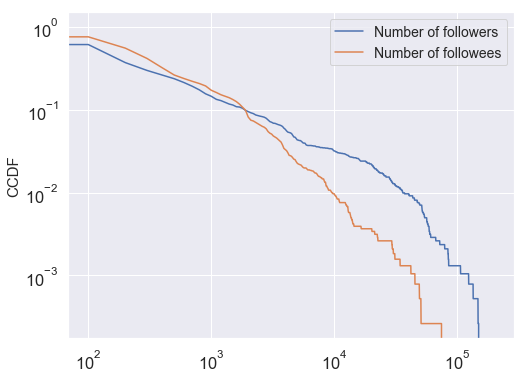

In [15]:
# user_data
# sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(user_data['follower_count'], 0, 200000, 100)
plt.plot(x, cdf, label='Number of followers', lw=1.5)

# pd.DataFrame({'x': x, 'cdf': cdf}).to_csv('data/dist_follower_count.csv')


x, cdf, pdf = get_cdf_pdf(user_data['following_count'], 0, 200000, 100)
plt.ylabel('CCDF', fontsize=15)
# pd.DataFrame({'x': x, 'cdf': cdf}).to_csv('data/dist_following_count.csv')

plt.xscale('log')
plt.yscale('log')

plt.plot(x, cdf, label='Number of followees', lw=1.5)
plt.legend(fontsize=14)
plt.savefig('fig/fol.pdf', dpi=300)
plt.show()

In [16]:
sns.set(style="ticks", font_scale=1.5)

# rs = np.random.RandomState(11)
# x = rs.gamma(2, size=100'""
# y = -.5 * x + rs.normal(size=1000)
x = []
y = []
for i, row in user_data.iterrows():
    if row.follower_count > 10 and row.following_count > 10:
        x.append(np.log10(row.follower_count))
        y.append(np.log10(row.following_count))
#         x.append(row.follower_count)
#         y.append(row.following_count)
_data = {
    "x": x,
    "y": y,
}
_data = pd.DataFrame(_data)
# print(_data)

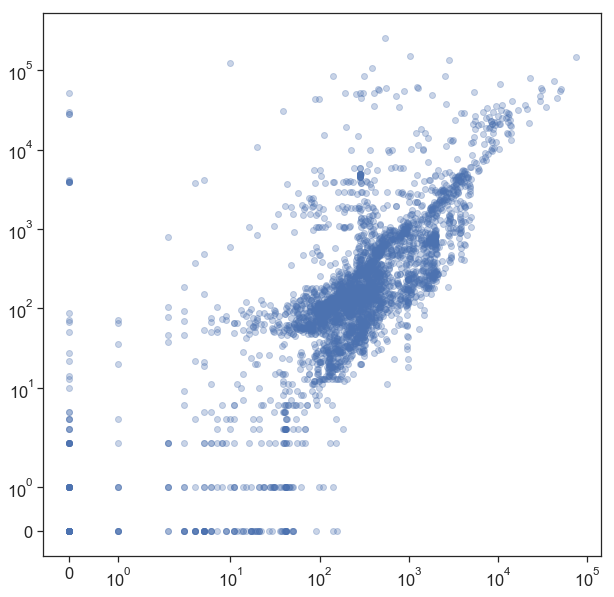

In [17]:
# sns.jointplot(x, y, kind="hex")
# plt.xlim(0.5, 5)
# plt.ylim(0.5, 5)
ax = plt.figure(figsize=(10, 10))
# sns.scatterplot(x="following_count", y="follower_count", data=user_data, alpha=0.5)
plt.scatter(user_data.following_count, user_data.follower_count, alpha=0.3)
# sns.scatterplot(x="following_count", y="follower_count", data=user_data, alpha=0.5)

# ax.set_xscale("log")
# ax.set_yscale("log")
# plt.xlim(-1, 100000)
# plt.ylim(-1, 100000)
plt.xscale("symlog")
plt.yscale("symlog")

# plt.legend()
# g.ax_joint.set_xscale('log')
# g.ax_joint.set_yscale('log')
plt.show()

In [109]:
user_data.iloc[user_data['follower_count'].idxmax(), :]

userid                                                             2527472164
user_display_name                                              Вестник Москвы
user_screen_name                                                   NovostiMsk
user_reported_location                                                 Москва
user_profile_description    Невозможно не любить этот город! Телефон редак...
user_profile_url                                      https://t.co/sIJZDK1hTI
follower_count                                                         257638
following_count                                                           544
account_creation_date                                     2014-05-04 00:00:00
account_language                                                           en
Name: 1014, dtype: object

In [80]:
user_data.iloc[user_data['following_count'].idxmax(), :]

userid                                                             4224729994
user_display_name                                                   Tennessee
user_screen_name                                                      TEN_GOP
user_reported_location                                                    NaN
user_profile_description    Unofficial Twitter of Tennessee Republicans. C...
user_profile_url                                                          NaN
follower_count                                                         147767
following_count                                                         74664
account_creation_date                                              2015-11-19
account_language                                                           en
Name: 2642, dtype: object

In [171]:
# user_data.groupby('account_creation_date').count()
user_data['account_creation_date'] = pd.to_datetime(user_data['account_creation_date'])
A = user_data.set_index('account_creation_date')
B = A.to_period('M').groupby('account_creation_date').count()
# creation_dates = pd.to_datetime(user_data["account_creation_date"])
# pd.date_range(2010)
# sum(B['userid'])

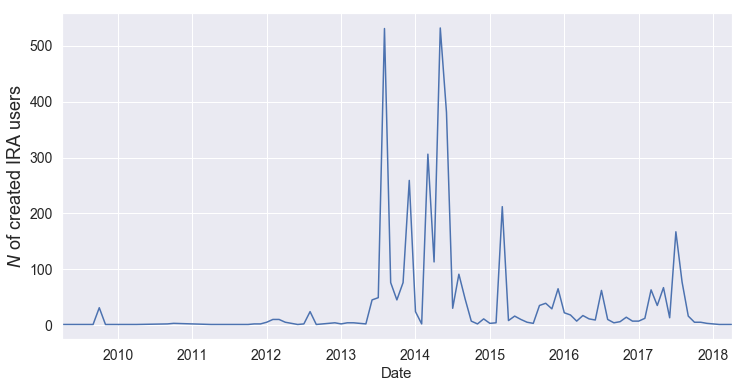

In [172]:
sns.set(style="darkgrid")

plt.figure(figsize=(12, 6))
# plt.plot_date(B.index, B['userid'])
B['userid'].plot()
plt.xlabel('Date', fontsize=15)
plt.ylabel('$N$ of created IRA users', fontsize=18)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig('fig/account_creation.pdf', dpi=300)
plt.show()

B.to_csv('data/account_creation.csv')

In [112]:
len(user_data)

3836

In [111]:
user_data["account_creation_date"].sort_values()

1954    2009-04-24
2431    2009-05-09
3644    2009-09-08
2435    2009-10-03
581     2009-10-04
1661    2009-10-04
409     2009-10-04
3580    2009-10-04
443     2009-10-04
3417    2009-10-05
2585    2009-10-05
2523    2009-10-05
1198    2009-10-05
1232    2009-10-05
1138    2009-10-06
1824    2009-10-06
1629    2009-10-06
2277    2009-10-06
177     2009-10-06
1945    2009-10-06
1861    2009-10-07
3496    2009-10-07
1983    2009-10-07
2909    2009-10-07
3454    2009-10-07
1200    2009-10-08
685     2009-10-08
3783    2009-10-08
26      2009-10-08
2649    2009-10-08
           ...    
1206    2017-09-03
3768    2017-09-04
2723    2017-09-04
2132    2017-09-04
1371    2017-09-05
816     2017-09-05
2145    2017-09-06
2991    2017-09-07
3660    2017-09-07
3191    2017-09-07
2537    2017-09-11
1352    2017-09-25
420     2017-09-25
2912    2017-09-26
686     2017-09-27
3731    2017-10-06
2422    2017-10-10
2622    2017-10-19
1613    2017-10-20
165     2017-10-21
2261    2017-11-01
128     2017

## !! 载入全部的Tweets

In [2]:
# load tweets
%time tweets = pd.read_csv('disk/ira_tweets_csv_hashed.csv', low_memory=True, dtype=str)

Wall time: 1min 6s


In [8]:
tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

In [9]:
de_tweets = tweets[tweets.tweet_language != "und"]

In [10]:
de_tweets.tweet_language.value_counts(normalize=True)[:10]

ru    0.569991
en    0.383104
de    0.011666
uk    0.009658
bg    0.006423
ar    0.004374
it    0.002393
es    0.001504
fr    0.001484
in    0.001213
Name: tweet_language, dtype: float64

In [11]:
tweets.tweet_language.value_counts()[:10]

ru     4853185
en     3261931
und     230713
de       99332
uk       82237
bg       54690
ar       37245
it       20376
es       12802
fr       12636
Name: tweet_language, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ru'),
  Text(1, 0, 'en'),
  Text(2, 0, 'und'),
  Text(3, 0, 'de'),
  Text(4, 0, 'uk'),
  Text(5, 0, 'bg'),
  Text(6, 0, 'ar'),
  Text(7, 0, 'it'),
  Text(8, 0, 'es'),
  Text(9, 0, 'fr')])

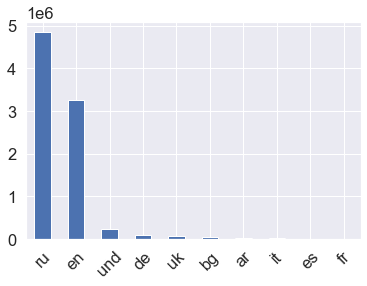

In [13]:
sns.set_style("darkgrid")
tweets.tweet_language.value_counts()[:10].plot(kind="bar")
plt.xticks(rotation=45)

In [14]:
len(tweets)

9041308

In [15]:
tweets.userid.value_counts()[:10]

a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db3fa9dd53b654ee9845    159503
2570574680                                                           95240
d2857a1f930016f6118ec3d00058b9ff687b54e49a85cf3c35042e36dab56c51     69982
7ca1009005708b6f4c4d25c1013ee0d5822494efc7a811000b62ee893e4d9855     64495
2752677905                                                           59420
2547141851                                                           53785
c6fdb5b31b765db7e3378b1e23b86ea2b0eb3c03e8db56a78a570bfe87200c8e     53721
2587843805                                                           52843
12b274fba679f8086a549a0f7be3b4de58e3d5d627ec6a5b34addd7bdbf257b3     50225
2943515140                                                           46742
Name: userid, dtype: int64

In [16]:
tweets[tweets.tweet_language == "en"].userid.value_counts()[:10]

a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db3fa9dd53b654ee9845    133315
2752677905                                                           58630
2547141851                                                           53071
2587843805                                                           51648
2943515140                                                           45947
2530830345                                                           45894
2495567768                                                           44711
7ca1009005708b6f4c4d25c1013ee0d5822494efc7a811000b62ee893e4d9855     44410
cc19cd3fba790e5aa198cc54d51c6fc7fa022d16ffdaf8a36975fb219ae19ba6     35016
cfb0d237487ebe3520cb83bd82df903c9c7afd5a60acba8a3576bc3ca9346467     34251
Name: userid, dtype: int64

In [11]:
ele_tweets = tweets[(tweets["tweet_time"]<"2016-11-09 00:00") & (tweets["tweet_time"]>="2016-06-01 00:00")]

In [12]:
len(ele_tweets)

672676

In [13]:
ele_tweets = ele_tweets[ele_tweets.tweet_language=="en"]

In [14]:
ele_tweets.userid.value_counts()[:10]

cfb0d237487ebe3520cb83bd82df903c9c7afd5a60acba8a3576bc3ca9346467    12308
2943515140                                                          12226
3438999494                                                          12133
2882013788                                                          10812
2951506251                                                           9056
396b0b6914e425ca53c49b7f1d6cfe9757eb7368c04c657a09d83b19a8f1251e     8365
3312143142                                                           7424
2587843805                                                           6301
1718000594                                                           5887
2882037326                                                           5637
Name: userid, dtype: int64

<AxesSubplot:>

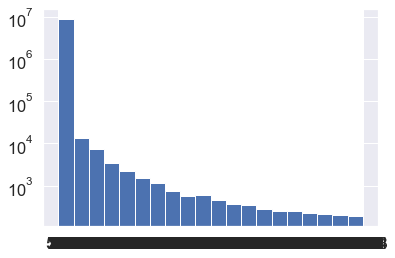

In [15]:
plt.yscale("log")
tweets.like_count.hist(bins=20)

In [16]:
plt.yscale("log")
tweets.reply_count.hist(bins=20)

<AxesSubplot:>

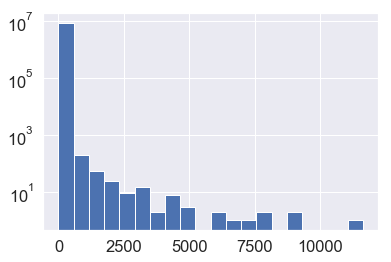

In [ ]:
plt.yscale("log")
tweets.quote_count.hist(bins=20)

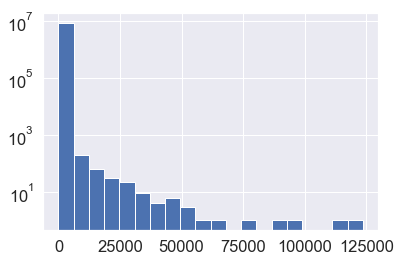

In [ ]:
plt.yscale("log")
tweets.retweet_count.hist(bins=20)

In [17]:
tweets['tweet_time'] = pd.to_datetime(tweets['tweet_time'])

In [21]:
A = tweets.set_index('tweet_time')
B = A.to_period('M').groupby('tweet_time').count()

B1 = 

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
tweet_time,,,,,,,,,,,,,,,,,,,,,
2009-05,20,20,20,20,20,20,20,20,20,20,...,0,0,20,20,20,20,0,1,4,0
2009-06,6,6,6,6,6,6,6,6,6,6,...,0,0,6,6,6,6,0,0,0,0
2009-07,8,8,8,8,8,8,8,8,8,8,...,0,0,8,8,8,8,0,3,1,0
2009-09,17,17,17,17,17,0,17,17,17,17,...,0,0,17,17,17,17,2,3,4,0
2009-10,6,6,6,6,6,0,6,6,6,6,...,0,0,6,6,6,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02,2615,2615,2615,2615,2212,2381,78,2615,2615,2615,...,0,0,2614,2614,2614,2614,2615,2615,498,1
2018-03,2371,2371,2371,2371,1981,2125,93,2371,2371,2371,...,2,2,2368,2368,2368,2368,2371,2371,489,0
2018-04,1711,1711,1711,1711,1479,1499,78,1711,1711,1711,...,2,2,1710,1710,1710,1710,1711,1711,233,0


109 109
Matteo Request


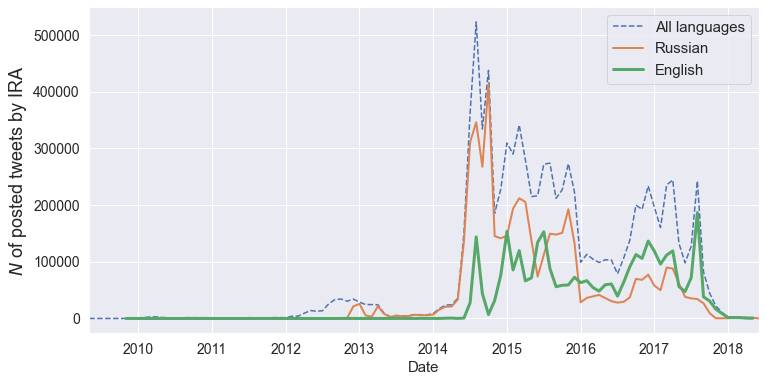

In [25]:
fig = plt.figure(figsize=(12, 6))
# ax = fig.add_subplot(1, 1, 1)
print(len(B.index), len(B['tweetid']))
# B = B[B.index > "2012-01"]
# plt.plot_date(B.index, B['tweetid'])
ax = B['tweetid'].plot(style="--", label="All languages")
B1['tweetid'].plot(ax=ax, label="Russian", lw=2)
B2['tweetid'].plot(ax=ax, label="English", lw=3)

B['tweetid'].to_csv("data/tweet-creation.csv")
B1['tweetid'].to_csv("data/tweet-Russian-creation.csv")
B2['tweetid'].to_csv("data/tweet-English-creation.csv")
print("Matteo Request")

plt.legend(fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('$N$ of posted tweets by IRA', fontsize=18)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig('fig/tweet_creation.pdf', dpi=300)
plt.show()

In [22]:
ru_tweets = tweets[tweets.tweet_language == "ru"]
A1 = ru_tweets.set_index('tweet_time')
B1 = A1.to_period('M').groupby('tweet_time').count()

In [24]:
en_tweets = tweets[tweets.tweet_language == "en"]
A2 = en_tweets.set_index('tweet_time')
B2 = A2.to_period('M').groupby('tweet_time').count()

In [146]:
# plt.figure(figsize=(12, 6))
print(len(B.index), len(B['tweetid']))
# B = B[B.index > "2012-01"]
# plt.plot_date(B.index, B['tweetid'])


# plt.xlabel('Date', fontsize=15)
# plt.ylabel('$N$ of posted (English) tweets by IRA', fontsize=15)
# plt.xticks(fontsize=14); plt.yticks(fontsize=14)
# plt.savefig('fig/en tweet_creation.pdf', dpi=300)
plt.show()

91 91


## Overlap of Ruaasian and English (language)

In [4]:
users_lang = {}

for i, row in tqdm(tweets.iterrows()):
    uid = row.userid
    if uid not in users_lang:
        users_lang[uid] = {}
    if row.tweet_language not in users_lang[uid]:
        users_lang[uid][row.tweet_language] = 0
    users_lang[uid][row.tweet_language] += 1

In [14]:
prop_en = []

for u, v in users_lang.items():
    # print(v)
    if "und" in v:
        del v["und"]
    if "en" in v:
        en = v["en"]
    else:
        en = 0
    if "ru" in v:
        ru = v["ru"]
    else:
        ru = 0
    _s = en + ru
    if _s > 0:
        prop_en.append(en / _s)

In [15]:
prop_en = pd.Series(prop_en)

In [16]:
prop_en.describe()

count    3586.000000
mean        0.615023
std         0.480596
min         0.000000
25%         0.003707
50%         1.000000
75%         1.000000
max         1.000000
dtype: float64

In [57]:
len(prop_en[prop_en == 1]) / len(prop_en)

0.5722253206915784

In [52]:
len(prop_en[prop_en <= 0.1])

1373

In [44]:
len(prop_en[prop_en == 1])

2052

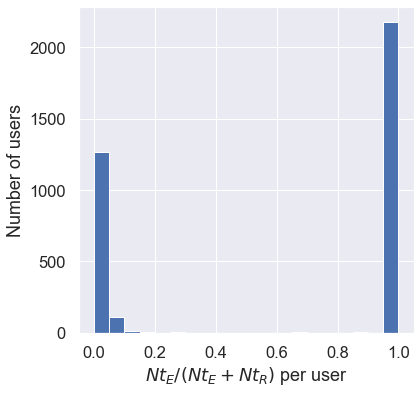

In [67]:
plt.figure(figsize=(6, 6))
prop_en.hist(bins=20)
plt.xlabel("$Nt_{E} / (Nt_{E} + Nt_{R})$ per user")
plt.ylabel("Number of users")
plt.savefig("fig/overlap.pdf", dpi=300)

In [27]:
_users_lang = []

for u, v in users_lang.items():
    v["userid"] = u
    _users_lang.append(v)

In [31]:
_users_lang = pd.DataFrame(_users_lang).set_index("userid")

In [37]:
_users_lang.sort_values("ru", ascending=False).head(10)

,bg,de,en,es,fr,in,lt,lv,ro,ru,...,ne,th,ps,mr,ta,ug,ml,iu,bn,km
userid,,,,,,,,,,,,,,,,,,,,,
2570574680,536.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,93501.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12b274fba679f8086a549a0f7be3b4de58e3d5d627ec6a5b34addd7bdbf257b3,247.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,49437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c6fdb5b31b765db7e3378b1e23b86ea2b0eb3c03e8db56a78a570bfe87200c8e,1262.0,8.0,431.0,16.0,16.0,12.0,38.0,3.0,8.0,49286.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3369109175,344.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,45399.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930747698,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37729.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508761973,370.0,4.0,36.0,1.0,2.0,2.0,9.0,NaN,NaN,35479.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2808833544,422.0,2.0,150.0,3.0,3.0,2.0,NaN,1.0,NaN,29366.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1240007161,268.0,9.0,136.0,4.0,14.0,1.0,NaN,NaN,NaN,28652.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d2857a1f930016f6118ec3d00058b9ff687b54e49a85cf3c35042e36dab56c51,492.0,16.0,331.0,12.0,11.0,1.0,23.0,1.0,5.0,27263.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
_users_lang.sort_values("en", ascending=False).head(10)

,bg,de,en,es,fr,in,lt,lv,ro,ru,...,ne,th,ps,mr,ta,ug,ml,iu,bn,km
userid,,,,,,,,,,,,,,,,,,,,,
a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db3fa9dd53b654ee9845,NaN,107.0,133315.0,254.0,229.0,150.0,14.0,6.0,283.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2752677905,NaN,64.0,58630.0,94.0,113.0,44.0,NaN,NaN,32.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2547141851,NaN,75.0,53071.0,90.0,135.0,28.0,3.0,NaN,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2587843805,NaN,129.0,51648.0,148.0,147.0,68.0,16.0,3.0,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2943515140,NaN,46.0,45947.0,149.0,115.0,48.0,1.0,1.0,86.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2530830345,NaN,72.0,45894.0,56.0,163.0,58.0,22.0,10.0,23.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2495567768,NaN,60.0,44711.0,127.0,93.0,24.0,3.0,NaN,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7ca1009005708b6f4c4d25c1013ee0d5822494efc7a811000b62ee893e4d9855,NaN,1105.0,44410.0,766.0,753.0,2561.0,115.0,34.0,346.0,1.0,...,1.0,1.0,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN
cc19cd3fba790e5aa198cc54d51c6fc7fa022d16ffdaf8a36975fb219ae19ba6,NaN,52.0,35016.0,81.0,109.0,29.0,NaN,NaN,63.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## URL analyse

In [54]:
for url in tweets.urls.head(20):
    try:
        print(url[1:-1])
    except:
        print(url, type(url))

http://ru-open.livejournal.com/374284.html
http://pyypilg33.livejournal.com/11069.html
https://www.youtube.com/watch?v=9GvpImWxTJc
nan <class 'float'>
https://goo.gl/fBp94X
https://goo.gl/9w5hso
http://nahnews.com.ua/180774-na-xarkovshhine-zaderzhali-furu-s-tonnami-poddelnoj-vodki/
http://bit.ly/1Rizso9
nan <class 'float'>
http://vesti.ru/t?2686779
nan <class 'float'>
nan <class 'float'>
nan <class 'float'>
http://bit.ly/1PMZqPI
http://bit.ly/1qYzyIL
http://bit.ly/1TK58o0
http://bit.ly/22rNBnQ
http://bit.ly/1h8fA98
http://bit.ly/1pjYCsY
https://goo.gl/cxchK2


In [55]:
len(tweets)

9041308

In [258]:
tweets = tweets[["tweetid", "userid", "urls"]]

In [263]:
# from urllib.parse import urlparse
# import requests

with open("data/IRA-en-urls.json", "w") as f:
    for i, row in tqdm(tweets.iterrows()):
        if not isinstance(row['urls'], str):
            continue
        elif row['urls'][1: -1] == '':
            continue
        else:
            url = row['urls'][1: -1]
            row.urls = url
            f.write(json.dumps(dict(row)) + "\n")

In [47]:
# build retweet networks

userid_map = json.load(open("data/userid_mapping.json"))
G = nx.DiGraph()
G.add_nodes_from(userid_map.values())
# G.number_of_nodes()

for i, row in tweets.iterrows():
    if row["is_retweet"]:
        if row['retweet_userid'] in userid_map:
            ret_userid = userid_map[row['retweet_userid']]
            userid = userid_map[row['userid']]
            if ret_userid != userid:
                G.add_edge(ret_userid, userid)

# save the network
nx.readwrite.adjlist.write_adjlist(G, 'retweet_net_in_IRA.dat')

In [21]:
G = nx.readwrite.adjlist.read_adjlist('retweet_net_in_IRA.dat')

In [48]:
G.number_of_nodes()

3836

In [49]:
G.number_of_edges()

168074

In [ ]:
plt.figure(figsize=(10, 6))

degree = nx.degree_histogram(G)
x = range(len(degree))                             
y = [z / float(sum(degree)) for z in degree]  
plt.loglog(x, y, linewidth=2)
plt.xlabel('$Degree$', fontsize=15); plt.ylabel('$Distribution$', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig('fig/degree_distribution.pdf', dpi=300)
plt.show()

d = dict(G.degree())
n, de = 0, 0
for k, v in d.items():
    if v > de:
        print(k, v)
        n, de = k, v
        
userid_map = json.load(open("data/userid_mapping.json"))
userid_map[n]

发现了一些匿名的用户的真实id，但是非常的少；

位置：data/IRAs_be_found.json，仅仅命中了21857

3836个用户中匿名有3669个；

## 如何判断一个人是不是IRAs？

所以我要创造一个UID of IRAs 


In [5]:
uids_of_IRA = set(json.load(open("data/IRA_match.json")).values())

In [6]:
# 看看IRAs在我fake news的数据中有哪些？

IRA_tweet_ids = set()
for line in open("data/IRAs_be_found.json"):
    d = json.loads(line)
    IRA_tweet_ids.add(d["tweet_id"])

In [7]:
url_tweets = json.load(open("data/url_tweets.json"))

In [8]:
IRA_tweets = [] # 存在在fake news里面的

cnt_0 = 0
cnt_1 = 0
cnt_2 = 0

for i, fake in enumerate(url_tweets):
#     print(i, fake)
    for j, t in enumerate(fake["tweets"]):
        if t["id"] in IRA_tweet_ids:
            cnt_2 += 1
            IRA_tweets.append(t["id"])
            url_tweets[i]["tweets"][j]["IRA"] = True
            if t["origin"]:
                cnt_1 += 1
                if j == 0:
                    cnt_0 += 1
        else:
            url_tweets[i]["tweets"][j]["IRA"] = False
                    
cnt_0, cnt_1, cnt_2

url_tweets[-1]

{'url': 'http://ln.is/truthfeed.com/viral-/znh3p',
 'tweets': [{'id': 796583343882207233,
   'dt': '2016-11-10 00:20:43',
   'origin': True,
   'user_id': 124896632,
   'IRA': False}]}

由目前的数据看，IRAs的活跃度很低。有可能是数据不重叠的问题，毕竟我之前的结果发现其中有大量的假新闻。我是不是应该解析URL然后添加进去呢？

1. 解析URL，如果满足的话就添加进去；
2. 看转发网络，如果转发了fake news里面数据就添加进去；

从以上两点可以扩充数据！

URL先继续解析着～

In [12]:
%time tweets = pd.read_csv('data/ira_tweets_csv_hashed.csv', usecols=["retweet_tweetid"], dtype=str)
print(len(tweets))
tweets = tweets.dropna()
print(len(tweets))
IRA_retweet_tweetids = [int(tid) for tid in tqdm(tweets["retweet_tweetid"])]
IRA_retweet_tweetids = set(IRA_retweet_tweetids)
len(IRA_retweet_tweetids)

CPU times: user 12.8 s, sys: 652 ms, total: 13.4 s
Wall time: 13.4 s
9041308
3333184


1725859

In [6]:
%time tweets = pd.read_csv('data/ira-tweets-ele.csv', usecols=["retweet_tweetid", "tweet_language"], dtype=str)
print(len(tweets))
# tweets = tweets[tweets.tweet_language=="en"]
# print(len(tweets))
tweets = tweets.dropna()
print(len(tweets))
IRA_retweet_tweetids = [int(tid) for tid in tqdm(tweets["retweet_tweetid"])]
IRA_retweet_tweetids = set(IRA_retweet_tweetids)
len(IRA_retweet_tweetids)

CPU times: user 880 ms, sys: 68 ms, total: 948 ms
Wall time: 1.14 s
391680
246163


147324

# Hashtag 分析

找到全部的hashtag，然后再看每个community下的hashtag

In [2]:
%time ele_tweets = pd.read_csv('data/ira-tweets-ele.csv', dtype=str)
# all_tweets = all_tweets.dropna()
# len(ele_tweets)
ele_tweets.columns

CPU times: user 3.03 s, sys: 124 ms, total: 3.15 s
Wall time: 3.15 s


Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

In [3]:
ht_count = Counter()
_sum = 0

for t in tqdm(ele_tweets.hashtags):
    t = t[1: -1].split(", ")
    if t != ['']:
        _sum += 1
        for w in t:
            ht_count["#" + w.lower()] += 1
print(_sum)


227863


In [9]:
sum([cnt for ht, cnt in ht_count.most_common()]) / len(ele_tweets)

0.7833026960784314

In [4]:
len(ht_count.most_common())

20649

In [5]:
ht_count.most_common(50)

[('#news', 15274),
 ('#world', 8567),
 ('#sports', 6339),
 ('#politics', 5233),
 ('#blacklivesmatter', 4168),
 ('#topnews', 3677),
 ('#mustbebanned', 3190),
 ('#igetdepressedwhen', 3041),
 ('#ihatepokemongobecause', 3012),
 ('#istartcryingwhen', 2773),
 ('#maga', 2715),
 ('#tcot', 2476),
 ('#tech', 2470),
 ('#toavoidworki', 2369),
 ('#foke', 2362),
 ('#donttellanyonebut', 2352),
 ('#tofeelbetteri', 2328),
 ('#obamaswishlist', 2172),
 ('#rejecteddebatetopics', 2131),
 ('#myolympicsportwouldbe', 2110),
 ('#health', 2089),
 ('#pjnet', 2070),
 ('#childrenthinkthat', 2040),
 ('#betteralternativetodebates', 2032),
 ('#obamanextjob', 2021),
 ('#myemmynominationwouldbe', 1937),
 ('#ihavearighttoknow', 1911),
 ('#environment', 1893),
 ('#ineedalawyerbecause', 1835),
 ('#ruinadinnerinonephrase', 1817),
 ('#thingsmoretrustedthanhillary', 1785),
 ('#neverhillary', 1754),
 ('#reasonstogetdivorced', 1689),
 ('#sextingwentwrongwhen', 1648),
 ('#wheniwasyoung', 1638),
 ('#trump', 1634),
 ('#blackskini

In [6]:
def count_ht(li):
    _sum = 0
    for l in li:
        _sum += l[1]
    return _sum

count_ht(ht_count.most_common(337)) / count_ht(ht_count.most_common())

0.716252069725297

In [8]:
for ht in ht_count.most_common(50):
    print(ht[0][1:], int(ht[1] / 500), sep=";")
#     print(ht[0][1:])    

news;30
world;17
sports;12
politics;10
blacklivesmatter;8
topnews;7
mustbebanned;6
igetdepressedwhen;6
ihatepokemongobecause;6
istartcryingwhen;5
maga;5
tcot;4
tech;4
toavoidworki;4
foke;4
donttellanyonebut;4
tofeelbetteri;4
obamaswishlist;4
rejecteddebatetopics;4
myolympicsportwouldbe;4
health;4
pjnet;4
childrenthinkthat;4
betteralternativetodebates;4
obamanextjob;4
myemmynominationwouldbe;3
ihavearighttoknow;3
environment;3
ineedalawyerbecause;3
ruinadinnerinonephrase;3
thingsmoretrustedthanhillary;3
neverhillary;3
reasonstogetdivorced;3
sextingwentwrongwhen;3
wheniwasyoung;3
trump;3
blackskinisnotacrime;3
ificouldntlie;3
partywentwrongwhen;2
makemehateyouinonephrase;2
thingseveryboywantstohear;2
trumpforpresident;2
trumpsfavoriteheadline;2
sometimesitsokto;2
ilovemyfriendsbut;2
ifihadabodydouble;2
nowplaying;2
isis;2
ihate____because;2
armywomenproblems;2


In [41]:
# save

json.dump(ht_count.most_common(337), open("data/top-hashtags.json", "w"), indent=2)

In [9]:
louvain_rst = json.load(open("data/louvain_rst_4.json"))
len(louvain_rst)

179682

In [10]:
from fake_identify import Are_you_IRA

Putin = Are_you_IRA()

In [11]:
Counter([v for k, v in louvain_rst.items()])

Counter({0: 137953, 3: 9624, 1: 31940, 2: 165})

In [12]:
Counter([v for k, v in louvain_rst.items() if Putin.check(k)])

Counter({0: 142, 1: 226, 3: 94, 2: 35})

In [13]:
from collections import defaultdict

comm_nodes = defaultdict(set)

for n, c in louvain_rst.items():
    comm_nodes[c].add(n)

In [16]:
# 统计每个社团的hashtags

ht_counts = {
    0: Counter(),
    2: Counter(),
    1: Counter(),
    3: Counter(),
}
# print(ht_counts)
not_in_comm = set()

for i, row in tqdm(ele_tweets.iterrows()):
    uid = Putin.uncover(row.userid)
    if uid in louvain_rst:
        c = louvain_rst[uid]
#         if c == 2:
#             continue
        hts = [ht.lower() for ht in row.hashtags[1: -1].split(", ") if ht]
        for ht in hts:
            ht_counts[c][ht] += 1
    else:
        not_in_comm.add(uid)
        
len(not_in_comm)

66

In [17]:
for k, _c in ht_counts.items():
    if k == 2:
        continue
    # print(k, _c.most_common(50))
    top_num = 0
    percent = 0
    for i, ht in enumerate(_c.most_common()):
#         if ht[1] < 50:
#             break

#         print(ht[0], int(ht[1]), sep=";")
        top_num += ht[1]

        # 每新增一个hashtag，占总的hashtags的数量比例小于0.5%则停止
        if top_num / sum(_c.values()) - percent < 0.0005:
            break
            
        percent = top_num / sum(_c.values())
        # print(i+1, top_num, sum(_c.values()), top_num / sum(_c.values()))
        
    print(k, i, top_num, sum(_c.values()), top_num / sum(_c.values()))

0 239 64686 93471 0.6920435215200437
1 239 29104 58311 0.4991168047195212
3 174 101968 117311 0.8692109009385309


In [20]:
json.dump(ht_counts[0].most_common(239), open("data/hashtags/C1.json", "w"))
json.dump(ht_counts[1].most_common(239), open("data/hashtags/C2.json", "w"))
json.dump(ht_counts[3].most_common(174), open("data/hashtags/C3.json", "w"))

# save data/hashtags
for ht in ht_counts[0].most_common(239):
    print(ht[0], ht[1], sep=";")
print(20 * "-")
for ht in ht_counts[1].most_common(239):
    print(ht[0], ht[1], sep=";")
print(20 * "-")
for ht in ht_counts[3].most_common(174):
    print(ht[0], ht[1], sep=";")

news;6612
maga;2644
politics;2625
sports;2605
tcot;2379
pjnet;2044
neverhillary;1656
trumpforpresident;1349
trump;1315
isis;1205
sanjose;1072
trumppence16;961
crookedhillary;922
hillary;912
trump2016;880
business;875
2a;782
wakeupamerica;751
syria;695
trumptrain;676
local;613
ccot;575
makeamericagreatagain;544
aleppo;513
hillaryclinton;499
thingsmoretrustedthanhillary;493
blacklivesmatter;479
is;445
p2;427
hillaryshealth;418
stlouis;410
hillaryforprison2016;409
debate;393
debatenight;374
benghazi;354
votetrump;345
basketofdeplorables;332
americafirst;331
chelsea;326
draintheswamp;322
breaking;318
birtherism;314
obama;309
saa;304
cosproject;300
hillaryforprison;297
iraq;295
electionday;292
gop;288
targets;286
iceisis;286
opiceisis;286
imwithher;270
debates;256
clinton;249
health;242
mosul;233
sandiego;232
dncleak;228
cr4u;224
chelseanyc;224
teaparty;222
bluelivesmatter;217
wikileaks;216
trumppence2016;211
feelthebern;209
rt;205
lyincrookedhillary;205
lockherup;205
demsinphilly;203
thing

In [11]:
ele_tweets.userid.value_counts().describe()

count      556.000000
mean       704.460432
std       1439.989381
min          1.000000
25%          8.000000
50%        114.500000
75%        903.250000
max      12308.000000
Name: userid, dtype: float64

In [13]:
cnt_0 = 0
cnt_1 = 0
cnt_2 = 0

# 这些tweet转发了fake news，他们有可能不在数据里面？？但是他们全部都刚好不在数据里面？？？
IRAs_retweets = []

for i, fake in enumerate(url_tweets):
    for j, t in enumerate(fake["tweets"]):
        if t["id"] in IRA_retweet_tweetids:
            tmp = all_tweets[all_tweets["retweet_tweetid"]==str(t["id"])]
            for _, row in tmp.iterrows():
                url_tweets[i]["tweets"].append({
                    "id": int(row["tweetid"]),
                    "dt": row["tweet_time"] + ":00",
                    "origin": False,
                    "IRA": True,
                    "user_id": row["userid"]
                })
                cnt_2 += 1
                if t["origin"]:
                    cnt_1 += 1
                    if j == 0:
                        cnt_0 += 1
                    
cnt_0, cnt_1, cnt_2

(237, 776, 776)

In [37]:
# 验证通过，save the data

json.dump(new_url_tweets, open("url_tweets_v2.json", "w"), indent=2)

In [8]:
%time all_tweets = pd.read_csv('data/ira_tweets_csv_hashed.csv', dtype=str)

CPU times: user 1min 14s, sys: 3.16 s, total: 1min 17s
Wall time: 1min 17s


In [10]:
# 时间上筛选数据
tweets = all_tweets[(all_tweets["tweet_time"]<"2016-11-09 00:00") & (all_tweets["tweet_time"]>="2016-06-01 00:00")]
print(len(tweets))
tweets = tweets[tweets.tweet_language=="en"]
print(len(tweets))
tweets.to_csv("data/ira-tweets-ele.csv", index=None)

672676
391680


In [45]:
tweets = pd.read_csv("data/ira-tweets-ele.csv")

In [50]:
len(tweets)

391680

## 针对这些选择后的数据进行url的分析

In [5]:
import tldextract

rst = []
for i, row in tqdm(tweets.iterrows()):
    urls = row["urls"][1:-1]
    if urls and len(urls.split("http")) < 3:
        rst.append({
            "tweetid": row.tweetid,
            "userid": row.userid,
            "url": urls,
            "hostname": ".".join(tldextract.extract(urls)[1:])
        }) 

In [6]:
from collections import Counter

Counter([d["hostname"] for d in rst]).most_common(50)

[('bit.ly', 31443),
 ('twitter.com', 25079),
 ('dailym.ai', 2566),
 ('dlvr.it', 2309),
 ('youtu.be', 1974),
 ('cbsloc.al', 1966),
 ('ow.ly', 1686),
 ('youtube.com', 1555),
 ('rt.com', 1477),
 ('fb.me', 1465),
 ('instagram.com', 1413),
 ('ln.is', 1354),
 ('goo.gl', 1225),
 ('buff.ly', 1201),
 ('hill.cm', 951),
 ('trib.al', 926),
 ('sh.st', 880),
 ('lat.ms', 843),
 ('1063.mobi', 837),
 ('facebook.com', 818),
 ('nydn.us', 784),
 ('ift.tt', 737),
 ('blackmattersus.com', 681),
 ('breitbart.com', 650),
 ('pushpowerpromo.com', 645),
 ('bsun.md', 509),
 ('wapo.st', 449),
 ('bloom.bg', 445),
 ('huffingtonpost.com', 404),
 ('vine.co', 402),
 ('twib.in', 392),
 ('wordpress.com', 370),
 ('blacktolive.org', 361),
 ('atlantablackstar.com', 358),
 ('foxnews.com', 347),
 ('usat.ly', 338),
 ('tinyurl.com', 318),
 ('rdo.to', 314),
 ('theroot.com', 312),
 ('soundcloud.com', 312),
 ('huff.to', 310),
 ('bayareane.ws', 306),
 ('thebea.st', 299),
 ('nyti.ms', 299),
 ('dailycaller.com', 289),
 ('USFREEDOMARMY

In [61]:
with open("data/ira-final-url.json", "w") as f:
    for r in tqdm(rst):
        f.write(json.dumps(r) + "\n")

In [121]:
# 关键词选择出与 分析 相关的数据，主要是election, trump, hillary
# IGNORE: 通过关键词合并数据，先放在一旁 !!!

# 通过关键词和时间来筛选出相关的数据

trump_count = 0
hillary_count = 0
election_count = 0

bingo_index = set()

for i, row in tqdm(tweets.iterrows()):
    words = set(str(row["tweet_text"]).lower().strip().split())
    
    if "trump" in words or "realdonaldtrump" in words or "@realdonaldtrump" in words or "donaldtrump" in words:
        trump_count += 1
        bingo_index.add(row["tweetid"])
    if "hillary" in words or "clinton" in words or "hillaryclinton" in words or "@hillaryclinton" in words:
        hillary_count += 1
        bingo_index.add(row["tweetid"])    
    if "election" in words or "elect" in words:
        election_count += 1
#         bingo_index.append(i)

len(bingo_index), trump_count, hillary_count, election_count

(31666, 16792, 17537, 2036)

In [122]:
df = tweets[tweets.tweetid.isin(bingo_index)]

In [123]:
df.to_csv("ira-tweets-trump-hillary.csv", index=None)

In [2]:
# select the pro-trump of tweets in election

# tweet_ids = set(
#     [str(json.loads(line.strip())["tweet_id"]) for line in open("data/IRA-tweets.json")])

# tweet_ids = pd.read_csv("data/ira-tweets-ele.csv", usecols=["tweetid"], dtype=str).tweetid.tolist()

# tweet_ids = set(pd.read_csv("data/ira-tweets-trump-hillary.csv", usecols=["tweetid"], dtype=str).tweetid.tolist())


# print(tweet_ids[0])

%time tweets = pd.read_csv("data/ira-tweets-ele.csv")
tweet_ids = set([str(tid) for tid in tweets.tweetid.tolist()])

NameError: name 'pd' is not defined

(13198, 6314)

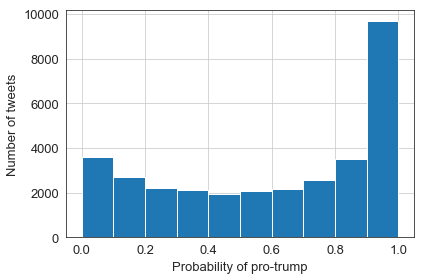

In [134]:
pros = []
for line in tqdm(open("data/IRA_support_trump.txt")):
    w = line.strip().split(",")
    if w[0] in tweet_ids:
        pros.append(float(w[1]))
        
# 分析pro-trump

d = pd.Series(pros)
d.hist(bins=10)
plt.xlabel('Probability of pro-trump', fontsize=13)
plt.ylabel('Number of tweets', fontsize=13)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig("fig/probality of pro-trump.pdf", dpi=300)

trump_count = 0
hillary_count = 0

for row in d:
    if row >= 0.8:
        trump_count += 1
    elif row < 0.2:
        hillary_count += 1
        
trump_count, hillary_count

could not convert string to float: 'pro_trump'


(423705, 562089)

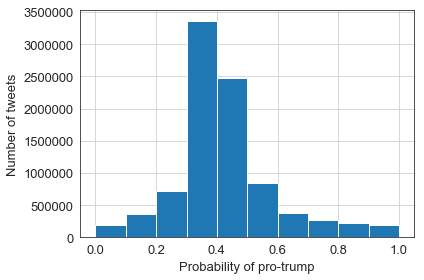

In [140]:
pros = []
for line in tqdm(open("data/IRA_support_trump.txt")):
    try:
        w = line.strip().split(",")
        pros.append(float(w[1]))
    except Exception as e:
        print(e)
        
# 分析pro-trump

d = pd.Series(pros)
d.hist(bins=10)
plt.xlabel('Probability of pro-trump', fontsize=13)
plt.ylabel('Number of tweets', fontsize=13)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig("fig/pro-trump-all.pdf", dpi=300)

trump_count = 0
hillary_count = 0

for row in d:
    if row >= 0.8:
        trump_count += 1
    elif row < 0.2:
        hillary_count += 1
        
trump_count, hillary_count

(52962, 72734)

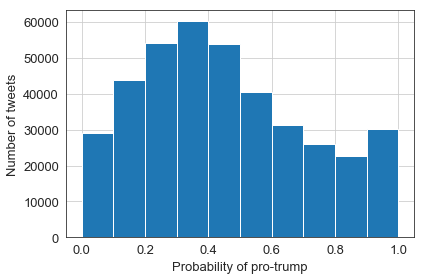

In [139]:
pros = []
for line in tqdm(open("data/IRA_support_trump.txt")):
    w = line.strip().split(",")
    if w[0] in tweet_ids:
        pros.append(float(w[1]))
        
# 分析pro-trump

d = pd.Series(pros)
d.hist(bins=10)
plt.xlabel('Probability of pro-trump', fontsize=13)
plt.ylabel('Number of tweets', fontsize=13)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig("fig/pro-trump-en.pdf", dpi=300)

trump_count = 0
hillary_count = 0

for row in d:
    if row >= 0.8:
        trump_count += 1
    elif row < 0.2:
        hillary_count += 1
        
trump_count, hillary_count

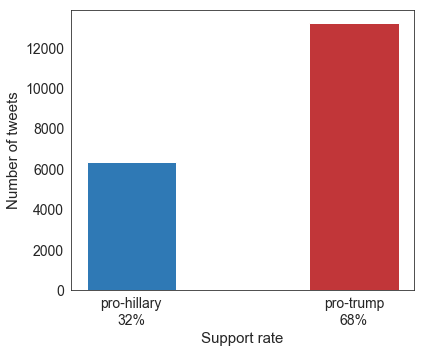

In [33]:
plt.figure(figsize=(6, 5))
plt.bar(1, hillary_count, color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, trump_count, color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(hillary_count / (trump_count + hillary_count)),
         "pro-trump\n{0:.0%}".format(trump_count / (trump_count + hillary_count))]
plt.xticks([1, 1.5], label)
plt.xlabel('Support rate', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("support rate.png", dpi=300)

### 分析构造的IRA全网络

In [2]:
all_net = nx.read_gpickle("data/network/ira-all.gpickle")

In [3]:
all_net.number_of_nodes()

136155

In [4]:
all_net.number_of_edges()

277346

In [14]:
# very important!

ira_user_set = set()
for uid in putin.IRA_user_set:
    try:
        if len(putin._map[uid]) != 64:
            ira_user_set.add(str(putin._map[uid]))
    except:
        if len(uid) != 64:
            ira_user_set.add(uid)

In [15]:
ira_user_list = list(ira_user_set)

In [17]:
all_net[ira_user_list[0]]

AtlasView({'2951904191': {}, '1339835893': {}, '2949261587': {}, '16715398': {}, '15980895': {}, '1330457336': {}, '3573336134': {}, '14522241': {}, '1640929196': {}, '716813053': {}, '22799750': {}, '759251': {}, '25073877': {}, '16589206': {}, '3313779296': {}, '41634520': {}, '1734949104': {}, '29417304': {}, '17629860': {}, '358545917': {}, '3245135844': {}, '18643437': {}, '66533920': {}, '16228398': {}, '229592356': {}, '823738296': {}, '2227403496': {}, '20772763': {}, '14717197': {}, '259001548': {}, '31228313': {}, '22203756': {}, '3124986791': {}, '439608838': {}, '17194090': {}, '4925188717': {}, '1140341359': {}, '4917092018': {}, '712967096': {}, '53130511': {}, '21688902': {}, '783214': {}, '2897970594': {}, '2864051403': {}, '18949452': {}, '15745368': {}, '45876240': {}})

In [5]:
CI_rst = np.load("data/CI_rst/CI_out_ira-all.rst.npy")
CI_rank_rst = CI_rst[0][:100]

In [7]:
gtG = gt.load_graph("data/network/ira-all.gt")

In [8]:
from fake_identify import Are_you_IRA

putin = Are_you_IRA()

In [10]:
gtG.list_properties()

CI_both        (vertex)  (type: int64_t)
CI_out         (vertex)  (type: int64_t)
id             (vertex)  (type: string)
katz           (vertex)  (type: double)
katz_rev       (vertex)  (type: double)


In [3]:
from all_tweets import ALL_TWEET

Lebron = ALL_TWEET()
all_tweets = Lebron.load_all_tweets()

loading all tweets_csv ...
finished!


In [27]:
IRA_tweet_id = all_tweets[(all_tweets.is_IRA > 0) & (all_tweets.media_type == "0")].tweet_id

In [30]:
IRA_tweet_ids = [_id for _id in IRA_tweet_id]

In [32]:
IRA_tweet_ids[0]

'786477613162246144'

## 获取IRA发布消息的client_name

In [16]:
# %time all_ira_tweets = pd.read_csv("data/ira_tweets_csv_hashed.csv", usecols=["tweetid", "tweet_client_name"], dtype=str)
%time all_ira_tweets = pd.read_csv("data/ira-tweets-ele.csv", usecols=["tweetid", "tweet_client_name"], dtype=str)

CPU times: user 1.54 s, sys: 0 ns, total: 1.54 s
Wall time: 1.58 s


In [17]:
official_twitter_clients = set([
    'Twitter for iPhone',
    'Twitter for Android',
    'Twitter Web Client',
    'Twitter Web App',
    'Twitter for iPad',
    'Mobile Web (M5)',
    'TweetDeck',
    'Mobile Web',
    'Mobile Web (M2)',
    'Twitter for Windows',
    'Twitter for Windows Phone',
    'Twitter for BlackBerry',
    'Twitter for Android Tablets',
    'Twitter for Mac',
    'Twitter for BlackBerry®',
    'Twitter Dashboard for iPhone',
    'Twitter for iPhone',
    'Twitter Ads',
    'Twitter for  Android',
    'Twitter for Apple Watch',
    'Twitter Business Experience',
    'Twitter for Google TV',
    'Chirp (Twitter Chrome extension)',
    'Twitter for Samsung Tablets',
    'Twitter for MediaTek Phones',
    'Google',
    'Facebook',
    'Twitter for Mac',
    'iOS',
    'Instagram',
    'Vine - Make a Scene',
    'Tumblr'])

In [18]:
clients_count = all_ira_tweets.tweet_client_name.value_counts()

In [20]:
unoff = 0
for client_name, row in clients_count.iteritems():
    if client_name in official_twitter_clients:
        print("√", client_name, row)
    else:
        print(client_name, row)
        unoff += row
        
"proportion of unofficial account:", unoff / sum(clients_count)

√ Twitter Web Client 272325
twitterfeed 67420
√ TweetDeck 45374
Twibble.io 3028
√ Twitter for Android 2320
dlvr.it 696
Buffer 124
√ Google 78
√ Twitter for iPhone 76
Medium 36
Crowdfire - Go Big 32
√ Facebook 25
fllwrs 22
WordPress.com 22
Tweetbot for iΟS 17
pourtwi 15
Hashtag Roundup 15
Twitter Lite 12
LiveJournal.com 10
√ Instagram 9
Linkis: turn sharing into growth 9
uCampaign 5
Viral Content Buzz 4
ReverbNation 3
Tweepi 1
vk.com pages 1
NovaPress Publisher 1


('proportion of unofficial account:', 0.1824780433006536)

In [21]:
new_client_names = [c.get_values()[0] for c in client_names]

NameError: name 'client_names' is not defined

In [56]:
from collections import Counter

count_clinet_names = Counter(new_client_names)

In [60]:
pd.Series(count_clinet_names)

Twitter Web Client     891
Twitter for Android     18
TweetDeck               45
dlvr.it                222
dtype: int64

In [62]:
# proportion of auto client in fake news of IRA

222 / (891 + 18 + 45 + 222)

0.18877551020408162

### IRA传播了哪些信息？他们影响了谁？

In [176]:
from collections import Counter
from imp import reload
import fake_identify
reload(fake_identify)

map_labels = {
    "-1": "-1",
    "0": "fake",
    "1": "extreme bias (right)",
    "2": "right",
    "3": "right leaning",
    "4": "center",
    "5": "left leaning",
    "6": "left",
    "7": "extreme bias (left)"
}

Putin = fake_identify.Who_is_fake()

bias_cnt = Counter()
bias_cnt_b = Counter()
bias_cnt_sci_f = Counter()
bias_cnt_sci_a = Counter()
fact_cnt = Counter()

cnt = Counter()
for line in open("data/ira-urls-plus-2.json"):
    d = json.loads(line.strip())
#     if "error" in d and d["error"]:
#         cnt["cannot analyzing this URL"] += 1
#         print(d)
#     else:
    hostname = d["hostname"]
    if hostname.startswith("www."):
        hostname = hostname[4:]
    cnt[hostname] += 1
#         if d["hostname"] == "m.vk.com":
#             print(d)

del cnt["bit.ly"]

print("hostname,count,category_alex,category_mbfc,category_sci_fake,category_sci_align",
      file=open("data/ira-hostname.csv", "a")) 
for v in cnt.most_common():
    label_b = Putin.identify(v[0])
    label = Putin.identify_v2(v[0])
    label_sci_f = Putin.identify_science_fake(v[0])
    label_sci_a = Putin.identify_science_align(v[0])

    bias_cnt_b[map_labels[str(label_b)]] += v[1]
    bias_cnt[label] += v[1]
    bias_cnt_sci_f[label_sci_f] += v[1]
    bias_cnt_sci_a[label_sci_a] += v[1]
    
#     fact_cnt[rst[1]] += v[1]
    print(v[0], v[1], map_labels[str(label_b)], label, label_sci_f, label_sci_a, sep=",",
          file=open("data/ira-hostname.csv", "a"))
    
#     if map_labels[str(label_b)] == "-1" and label != "-1":
#         print(v[0], v[1], map_labels[str(label_b)], label, sep=",")

In [76]:
bias_cnt.most_common()

[('-1', 78388),
 ('left leaning', 20707),
 ('fake', 9594),
 ('right', 4147),
 ('left', 3651),
 ('right leaning', 2937),
 ('center', 2347)]

In [77]:
bias_cnt_b.most_common()

[('-1', 98770),
 ('left leaning', 5168),
 ('right', 5127),
 ('center', 4022),
 ('extreme bias (right)', 2660),
 ('left', 2275),
 ('right leaning', 2103),
 ('fake', 1539),
 ('extreme bias (left)', 107)]

In [78]:
bias_cnt_sci_f.most_common()

[('-1', 118392), ('Red', 1636), ('Orange', 1046), ('Black', 697)]

In [178]:
bias_cnt = Counter()
bias_cnt_b = Counter()
bias_cnt_sci_f = Counter()
bias_cnt_sci_a = Counter()
fact_cnt = Counter()

cnt = Counter()
for line in tqdm(open("disk/bingo_tweets.json")):
    d = json.loads(line.strip())
#     if "error" in d and d["error"]:
#         cnt["cannot analyzing this URL"] += 1
#         print(d)
#     else:
    hostname = d["final_hostname"]
    if hostname.startswith("www."):
        hostname = hostname[4:]
    cnt[hostname] += 1
#         if d["hostname"] == "m.vk.com":
#             print(d)

del cnt["bit.ly"]

print("hostname,count,category_alex,category_mbfc,category_sci_fake,category_sci_align",
      file=open("data/all-hostname.csv", "a")) 
for v in cnt.most_common():
    label_b = Putin.identify(v[0])
    label = Putin.identify_v2(v[0])
    label_sci_f = Putin.identify_science_fake(v[0])
    label_sci_a = Putin.identify_science_align(v[0])

    bias_cnt_b[map_labels[str(label_b)]] += v[1]
    bias_cnt[label] += v[1]
    bias_cnt_sci_f[label_sci_f] += v[1]
    bias_cnt_sci_a[label_sci_a] += v[1]
    
#     fact_cnt[rst[1]] += v[1]
    print(v[0], v[1], map_labels[str(label_b)], label, label_sci_f, label_sci_a, sep=",",
          file=open("data/all-hostname.csv", "a"))
    
#     if map_labels[str(label_b)] == "-1" and label != "-1":
#         print(v[0], v[1], map_labels[str(label_b)], label, sep=",")

In [80]:
import sqlite3

# all
conn = sqlite3.connect(
    "/home/alex/network_workdir/elections/databases/urls_db.sqlite")
c = conn.cursor()
c.execute('''SELECT * FROM urls;''')
col_names = [t[0] for t in c.description]

with open("disk/all_tweets.json", "w") as f:
    print("start ...")
    for d in tqdm(c.fetchall()):
        if d[8]:
            hostname = d[8].lower()
            # print(hostname)
            if hostname.startswith("www."):
                hostname = hostname[4:]
                
            label_b = map_labels[str(Putin.identify(hostname))]
            label = Putin.identify_v2(hostname)
            label_sci_f = Putin.identify_science_fake(hostname)
            label_sci_a = Putin.identify_science_align(hostname)

            json_d = {k: v for k, v in zip(col_names, d)}
            json_d["media_type"] = label_b
            json_d["c_mbfc"] = label                         
            json_d["c_sci_fake"] = label_sci_f                         
            json_d["c_sci_align"] = label_sci_a
            
            f.write(json.dumps(json_d, ensure_ascii=False) + '\n')
            # self.tweet_ids.append(json_d["tweet_id"])
            
conn.close()

start ...


分析全局的URL的情况

In [89]:


# bingo_tweets.json 是指至少被识别过一次的
with open("disk/bingo_tweets.json", "w") as f:
    for line in tqdm(open("disk/all_tweets.json")):
        d = json.loads(line.strip())
        if d["c_mbfc"] != "-1" or d["media_type"] != "-1" or d["c_sci_fake"] != "-1":
            f.write(line)
    

In [3]:
from collections import Counter

ht_cnt = Counter()

for line in tqdm(open("disk/all_tweets.json")):
    d = json.loads(line.strip())
    ht_cnt[d["final_hostname"]] += 1


In [7]:
import fake_identify

map_labels = {
    "-1": "-1",
    "0": "fake",
    "1": "extreme bias (right)",
    "2": "right",
    "3": "right leaning",
    "4": "center",
    "5": "left leaning",
    "6": "left",
    "7": "extreme bias (left)"
}

Putin = fake_identify.Who_is_fake()

bias_cnt = Counter()
bias_cnt_b = Counter()
bias_cnt_sci_f = Counter()
bias_cnt_sci_a = Counter()


print("hostname,count,category_alex,category_mbfc,category_sci_fake,category_sci_align", file=open("data/all-hostname-stat.csv", "a")) 
for v in ht_cnt.most_common(1000):
    label_b = Putin.identify(v[0])
    label = Putin.identify_v2(v[0])
    label_sci_f = Putin.identify_science_fake(v[0])
    label_sci_a = Putin.identify_science_align(v[0])

    bias_cnt_b[map_labels[str(label_b)]] += v[1]
    bias_cnt[label] += v[1]
    bias_cnt_sci_f[label_sci_f] += v[1]
    bias_cnt_sci_a[label_sci_a] += v[1]
    
    print(v[0], v[1], map_labels[str(label_b)], label, label_sci_f, label_sci_a, sep=",", file=open("data/all-hostname-stat.csv", "a"))

In [84]:
bias_cnt.most_common()

[('-1', 21366414),
 ('left leaning', 11670096),
 ('left', 7276584),
 ('fake', 6668013),
 ('right', 5399583),
 ('center', 2513694),
 ('right leaning', 2227513)]

In [85]:
bias_cnt_b.most_common()

[('-1', 26093139),
 ('left leaning', 7531427),
 ('center', 6494813),
 ('left', 4365831),
 ('right', 4042993),
 ('extreme bias (right)', 3981096),
 ('fake', 2994422),
 ('right leaning', 1008316),
 ('extreme bias (left)', 609860)]

In [86]:
bias_cnt_sci_f.most_common()

[('-1', 51447062), ('Red', 2644269), ('Orange', 2011747), ('Black', 1018819)]

我们来看一下语言的问题

In [14]:
%time ira_tweets = pd.read_csv("data/ira-tweets-ele.csv")

CPU times: user 3.42 s, sys: 80 ms, total: 3.5 s
Wall time: 3 s


In [15]:
Counter(ira_tweets["tweet_language"]).most_common()

[('en', 391680)]

## IRA与谁交互了？他们的特点是什么样的？

猜测：他们的倾向非常偏右，而且这类人群很集中，是目标的一群特定用户。他们基本不会相信其它人，已经深陷到fake news中。

In [169]:
ira_tweets = pd.read_csv("data/ira-tweets-ele.csv", dtype=str)

In [170]:
len(ira_tweets)

391680

In [13]:
ira_tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

reply tweets

In [15]:
reply_ira_tweets = ira_tweets[ira_tweets.in_reply_to_tweetid.notnull()]
quote_ira_tweets = ira_tweets[ira_tweets.quoted_tweet_tweetid.notnull()]
ret_ira_tweets = ira_tweets[ira_tweets.retweet_tweetid.notnull()]
men_ira_tweets = ira_tweets[ira_tweets.user_mentions.notnull()]

len(ira_tweets), len(reply_ira_tweets), len(quote_ira_tweets), len(ret_ira_tweets), len(men_ira_tweets)

(391680, 5350, 29716, 246163, 259279)

In [41]:
for row in men_ira_tweets.user_mentions:
    print(row[1:-1].split(", "))
    break

['2683299690', '69231187']


In [26]:
# quote是不是一定是ret？极大部分是，小部分不是
len(set(quote_ira_tweets.tweetid) & set(ret_ira_tweets.tweetid))

26612

In [27]:
# quote有一些可能是reply
len(set(reply_ira_tweets.tweetid) & set(quote_ira_tweets.tweetid))

158

In [28]:
# reply一定不是ret
len(set(reply_ira_tweets.tweetid) & set(ret_ira_tweets.tweetid))

0

In [20]:
original_ira_tweets = ira_tweets[(ira_tweets.in_reply_to_tweetid.isnull()) & \
                                 (ira_tweets.quoted_tweet_tweetid.isnull()) & \
                                 (ira_tweets.retweet_tweetid.isnull())]

In [34]:
original_ira_tweets = set(ira_tweets[ira_tweets.retweet_tweetid.isnull()].tweetid.tolist())

In [35]:
len(original_ira_tweets)

145517

## 先不跟Alex数据混合起来分析一下，在fake news下，源和非源的比例

In [39]:
_tweets = {}

for line in tqdm(open("disk/all_IRA_tweets.json")):
    d = json.loads(line.strip())
    tweet = {
        "tweet_id": str(d["tweetid"]),
        "user_id": -1,
        "dt": "2000-01-01 00:00:00",
        "is_first": -1,
        "is_source": -1,
        "is_IRA": 1,
        "URL": d["final_url"].lower(),
        "hostname": d["hostname"].lower(),
        "c_alex": d["media_type"],
        "c_mbfc": d["c_mbfc"],
        "c_sci_f": d["c_sci_fake"],
        "c_sci_s": d["c_sci_align"],
        "retweeted_id": -1,
    }
    # if tweet["URL"].endswith("/"):
    #     tweet["URL"] = tweet["URL"][:-1]
    _tweets[str(d["tweetid"])] = tweet
    
_tweets = pd.DataFrame(list(_tweets.values()))

In [49]:
_tweets[_tweets.c_mbfc!="-1"].shape

(43383, 13)

In [54]:
_tweets[_tweets.c_mbfc=="left leaning"].shape

(20707, 13)

In [55]:
d = json.load(open("IRA-tweets-id.txt"))

In [57]:
maybe_tweet_ids = []

for _i in d.values():
    for _j in _i:
        maybe_tweet_ids.append(_j)

In [61]:
all_tweets_id = set(tweets.tweetid.tolist())

In [63]:
cnt = 0

for t_id in maybe_tweet_ids:
    if t_id not in all_tweets_id:
        cnt += 1
cnt

8698

8698个tweets是原来数据中没有的。

In [3]:
%time tweets = pd.read_csv("data/ira-tweets-ele.csv")

CPU times: user 3.28 s, sys: 140 ms, total: 3.42 s
Wall time: 3.23 s


In [17]:
len(tweets.userid.unique())

556

In [4]:
tweets.loc[0]

tweetid                                                    784084336307863552
userid                      8e58ab0f46d273103d9e71aa92cdaffb6e330ec7d15ae5...
user_display_name           8e58ab0f46d273103d9e71aa92cdaffb6e330ec7d15ae5...
user_screen_name            8e58ab0f46d273103d9e71aa92cdaffb6e330ec7d15ae5...
user_reported_location                                                    NaN
user_profile_description    In bad luck, hold out; in good luck, hold in. ...
user_profile_url                                                          NaN
follower_count                                                            881
following_count                                                           834
account_creation_date                                              2013-09-16
account_language                                                           en
tweet_language                                                             en
tweet_text                  RT @Herobright2: @UNHumanRights NIGE

In [5]:
users = {}

for i, d in tqdm(tweets.iterrows()):
    if d["userid"] not in users:
        users[d["userid"]] = {
            "original tweet": 0,
            "retweet": 0
        }
        
    if pd.isnull(d["retweet_userid"]):
        users[d["userid"]]["original tweet"] += 1
    else:
        users[d["userid"]]["retweet"] += 1

In [6]:
source_pro = [v["original tweet"] / (v["original tweet"] + v["retweet"]) for k, v in users.items()]

In [11]:
len(source_pro)

556

In [14]:
len([_p for _p in source_pro if _p > 0.9])

143

In [13]:
len([_p for _p in source_pro if _p < 0.1])

280

In [18]:
280 / 556

0.5035971223021583

In [19]:
143 / 556

0.25719424460431656

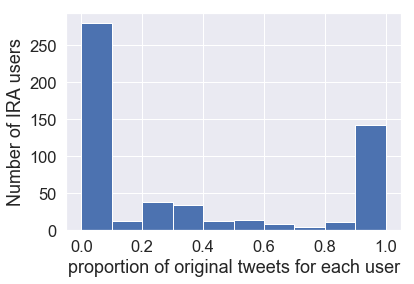

In [7]:
pd.Series(source_pro).hist()
plt.xlabel("proportion of original tweets for each user")
plt.ylabel("Number of IRA users")
plt.savefig("fig/proportion-of-original-tweets.pdf", dpi=300, bbox_inches='tight')

In [7]:
data = pd.DataFrame(users).transpose()

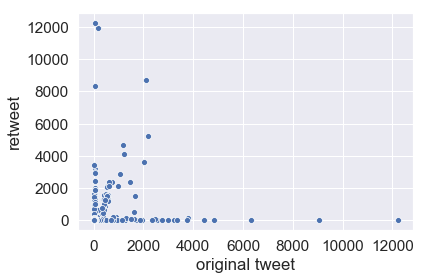

In [8]:
sns.scatterplot(x="original tweet", y="retweet", data=data)

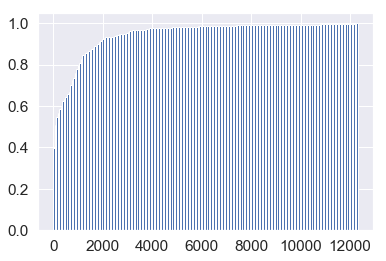

In [13]:
tweets.userid.value_counts().hist(cumulative=True, density=1, bins=200)

In [14]:
tweets.userid.value_counts().head(100)

cfb0d237487ebe3520cb83bd82df903c9c7afd5a60acba8a3576bc3ca9346467    12308
2943515140                                                          12226
3438999494                                                          12133
2882013788                                                          10812
2951506251                                                           9056
396b0b6914e425ca53c49b7f1d6cfe9757eb7368c04c657a09d83b19a8f1251e     8365
3312143142                                                           7424
2587843805                                                           6301
1718000594                                                           5887
2882037326                                                           5637
2882350436                                                           5359
3899481526                                                           4854
080da9e6b0c293d8e7abe6115605790ec8bc9a5c75a2b3e60539e67e3f100875     4413
4224729994                            